In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/IndianFoodDatasetCSV.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd

# Load the training dataset
train_data_path = '/content/IndianFoodDatasetCSV.csv'

# Use pandas to read the CSV file
train_df = pd.read_csv(train_data_path)



In [8]:
# Display the first few rows of the dataframe
print(train_df.head())

# Check the columns available
print(train_df.columns)

# Check the data types and basic statistics
print(train_df.info())
print(train_df.describe())


   Srno                                         RecipeName  \
0     1                               Masala Karela Recipe   
1     2  टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...   
2     3  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
3     4  Gongura Chicken Curry Recipe - Andhra Style Go...   
4     5  आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...   

                                TranslatedRecipeName  \
0                               Masala Karela Recipe   
1                         Spicy Tomato Rice (Recipe)   
2  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
3  Gongura Chicken Curry Recipe - Andhra Style Go...   
4  Andhra Style Alam Pachadi Recipe - Adrak Chutn...   

                                         Ingredients  \
0  6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...   
1  2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...   
2  1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...   
3  500 grams Chicken,2 Onion - chopped,1 Tomato -...   
4  1 बड़ा च

In [9]:
# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (if any)
# For example, if 'ingredients' column had missing values, you could handle them like this:
# Option 1: Use df.fillna() with a dictionary
train_df.fillna({'Ingredients': 'Unknown'}, inplace=True)

# Option 2: Assign the filled DataFrame back to itself
train_df['Ingredients'] = train_df['Ingredients'].fillna(value='Unknown')



Missing Values:
 Srno                      0
RecipeName                0
TranslatedRecipeName      0
Ingredients               6
TranslatedIngredients     6
PrepTimeInMins            0
CookTimeInMins            0
TotalTimeInMins           0
Servings                  0
Cuisine                   0
Course                    0
Diet                      0
Instructions              0
TranslatedInstructions    0
URL                       0
dtype: int64


In [10]:
# Example of standardizing ingredient names (convert to lowercase)
train_df['Ingredients'] = train_df['Ingredients'].apply(lambda x: [ingredient.lower() for ingredient in x])


In [11]:
# Example of tokenization (splitting ingredients into individual tokens)
train_df['Ingredients'] = train_df['Ingredients'].apply(lambda x: ' '.join(x))


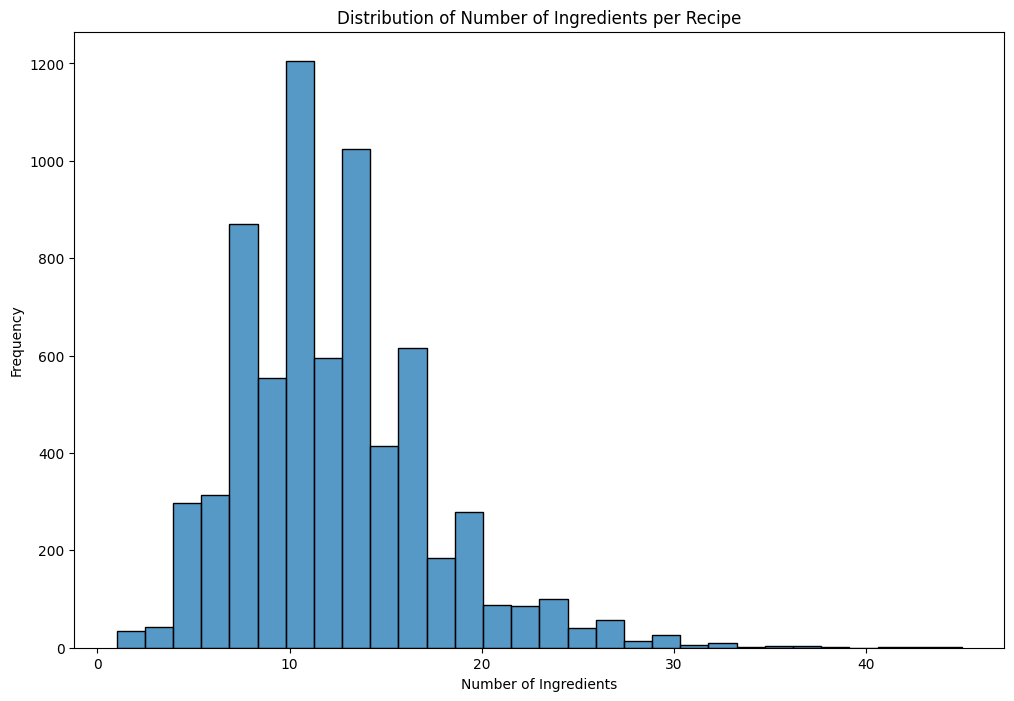

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the frequency of ingredients
plt.figure(figsize=(12, 8))
ingredients_count = train_df['Ingredients'].str.split(',').apply(lambda x: len(x))
sns.histplot(ingredients_count, bins=30, kde=False)
plt.title('Distribution of Number of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()


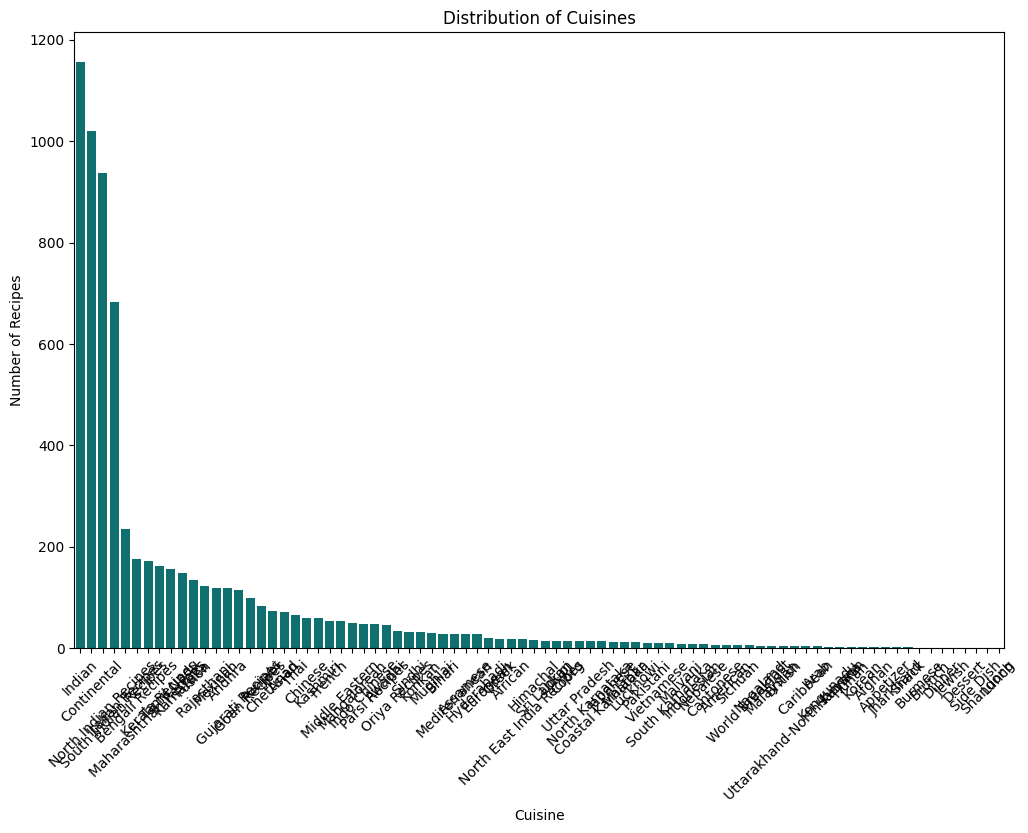

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of cuisines
plt.figure(figsize=(12, 8))
cuisine_counts = train_df['Cuisine'].value_counts()
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, color='teal')
plt.xticks(rotation=45)
plt.title('Distribution of Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Recipes')
plt.show()


In [14]:
from collections import Counter
import pandas as pd

# Assuming the 'Ingredients' column has the ingredients as a comma-separated string
ingredients_list = train_df['TranslatedIngredients'].dropna().str.split(', ')

# Flatten the list of lists into a single list of ingredients
flattened_ingredients = [item for sublist in ingredients_list for item in sublist]

# Count the frequency of each ingredient
ingredient_counts = Counter(flattened_ingredients)

# Get the 10 most common ingredients
most_common_ingredients = ingredient_counts.most_common(10)

# Display the results
print("Most Common Ingredient Combinations:")
for ingredient, count in most_common_ingredients:
    print(f"{ingredient}: {count} occurrences")


Most Common Ingredient Combinations:
salt - as per taste: 390 occurrences
oil - as per use: 118 occurrences
1/2 teaspoon turmeric powder: 95 occurrences
1 onion - finely chopped: 92 occurrences
1 teaspoon cumin seeds: 77 occurrences
1/2 teaspoon cumin seeds: 60 occurrences
1 teaspoon turmeric powder: 60 occurrences
1 teaspoon mustard: 58 occurrences
1 teaspoon coriander powder: 52 occurrences
2 green chillies - finely chopped: 50 occurrences


In [15]:
# Example to find popular recipes based on cuisine
popular_recipes = train_df['Cuisine'].value_counts().nlargest(5)
print("Top 5 Popular Cuisines:")
print(popular_recipes)


Top 5 Popular Cuisines:
Cuisine
Indian                  1157
Continental             1021
North Indian Recipes     938
South Indian Recipes     682
Italian Recipes          236
Name: count, dtype: int64


In [16]:
import pandas as pd
import re

# Load the CSV dataset (instead of JSON)
train_data_path = '/content/IndianFoodDatasetCSV.csv'
train_df = pd.read_csv(train_data_path)

# Check the columns of the CSV file to ensure correct references
print(train_df.columns)

# Assuming 'ingredients' column contains the ingredients data
def clean_ingredients(Ingredients):
    # Check if the ingredient is a string before applying regex
    if isinstance(Ingredients, str):
        # Remove unwanted characters and extra spaces
        Ingredients = re.sub(r'[^\w\s,]', '', Ingredients)  # Remove non-alphanumeric characters
        Ingredients = re.sub(r'\s+', ' ', Ingredients).strip()  # Remove extra spaces
        # Convert to a list of words
        return [Ingredient.strip() for Ingredient in Ingredients.split(',') if Ingredient.strip()]
    else:
        # Handle non-string values (e.g., return an empty list or a special value)
        return []  # Return an empty list for non-string ingredients

# Apply cleaning to the 'TranslatedIngredients' column (adjusting for the correct column)
train_df['cleaned_ingredients'] = train_df['TranslatedIngredients'].apply(clean_ingredients)

# Check the cleaned data
print(train_df[['TranslatedIngredients', 'cleaned_ingredients']].head())


Index(['Srno', 'RecipeName', 'TranslatedRecipeName', 'Ingredients',
       'TranslatedIngredients', 'PrepTimeInMins', 'CookTimeInMins',
       'TotalTimeInMins', 'Servings', 'Cuisine', 'Course', 'Diet',
       'Instructions', 'TranslatedInstructions', 'URL'],
      dtype='object')
                               TranslatedIngredients  \
0  6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...   
1  2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...   
2  1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...   
3  500 grams Chicken,2 Onion - chopped,1 Tomato -...   
4  1 tablespoon chana dal, 1 tablespoon white ura...   

                                 cleaned_ingredients  
0  [6 Karela Bitter Gourd Pavakkai deseeded, Salt...  
1  [21 2 cups rice cooked, 3 tomatoes, 3 teaspoon...  
2  [112 cups Rice Vermicelli Noodles Thin, 1 Onio...  
3  [500 grams Chicken, 2 Onion chopped, 1 Tomato ...  
4  [1 tablespoon chana dal, 1 tablespoon white ur...  


In [17]:
import pandas as pd

# Load your CSV dataset
train_data_path = '/content/IndianFoodDatasetCSV.csv'
df = pd.read_csv(train_data_path)

# Inspect the first few rows of the dataset
print("Initial Data:")
print(df.head())

# Define the cleaning function for the 'Ingredients' column
def clean_ingredients(ingredients):
    if isinstance(ingredients, str):
        # Convert to lowercase and split by commas
        ingredients = ingredients.lower().split(',')
        # Strip any extra spaces from each ingredient
        return [ingredient.strip() for ingredient in ingredients]
    return []  # Return an empty list if 'Ingredients' is not a string

# Apply the cleaning function to the 'Ingredients' column
df['cleaned_ingredients'] = df['Ingredients'].apply(clean_ingredients)

# Verify the cleaning process
print("\nCleaned Data:")
print(df[['Ingredients', 'cleaned_ingredients']].head())

# Optional: Check for any potential issues with empty lists
empty_cleaned_ingredients = df[df['cleaned_ingredients'].apply(lambda x: len(x) == 0)]
print("\nRows with empty cleaned ingredients:")
print(empty_cleaned_ingredients)

# Save the cleaned dataset to a new file if needed
cleaned_file_path = '/content/cleaned_recipes.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")


Initial Data:
   Srno                                         RecipeName  \
0     1                               Masala Karela Recipe   
1     2  टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...   
2     3  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
3     4  Gongura Chicken Curry Recipe - Andhra Style Go...   
4     5  आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...   

                                TranslatedRecipeName  \
0                               Masala Karela Recipe   
1                         Spicy Tomato Rice (Recipe)   
2  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
3  Gongura Chicken Curry Recipe - Andhra Style Go...   
4  Andhra Style Alam Pachadi Recipe - Adrak Chutn...   

                                         Ingredients  \
0  6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...   
1  2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...   
2  1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...   
3  500 grams Chicken,2 Onion - chopped,1 Tomato -...

In [18]:
import re

def recommend_recipes_by_keywords(ingredients_list, df):
    recommendations = []

    # Ensure that ingredients_list is a list of strings and convert them to lowercase
    ingredients_list = [ingredient.lower() for ingredient in ingredients_list]

    for index, row in df.iterrows():
        # Ensure row['cleaned_ingredients'] is a list of strings and convert them to lowercase
        ingredients_in_row = [ingredient.lower() for ingredient in row['cleaned_ingredients']]

        # Debugging print
        print(f"Checking recipe at index {index} with ingredients: {ingredients_in_row}")

        # Check for partial matches between user input ingredients and recipe ingredients
        if all(any(re.search(ingredient, ing_row) for ing_row in ingredients_in_row) for ingredient in ingredients_list):
            recommendations.append(row['Cuisine'])

    return recommendations

# Example usage
user_input = ['potato']
recommended_cuisines = recommend_recipes_by_keywords(user_input, df)
print("Recommended cuisines based on input:", recommended_cuisines)


Streaming output truncated to the last 5000 lines.
Checking recipe at index 1872 with ingredients: ['1 cup green peas (matar) - boiled', '1/2 teaspoon cumin seeds (jeera)', '1 teaspoon mustard seeds', '3 to 4 curry leaves', '2 green chillies - finely chopped', '1 bay leaf (tej patta) - broken into two piece', '2 to 3 cloves (laung)', 'cardamom (elaichi) pods/seeds', '1 tablespoon ginger garlic paste', '1 onion - finely chopped', '1/2 cup onion - paste', '3/4 cup homemade tomato puree', '1 teaspoon red chilli powder', '1 teaspoon turmeric powder (haldi)', '1-1/2 teaspoon coriander powder (dhania)', 'salt - as required']
Checking recipe at index 1873 with ingredients: ['300 grams banana stem - cut into small diced and soaked in butter milk', '1 cup raw peanuts (moongphali)', '1/2 cup pearl onions (sambar onions) - finely chopped', '3 cloves garlic - smashed', '1 cup tomato - cut into small pieces', '1/2 teaspoon turmeric powder (haldi)', '1/2 teaspoon red chilli powder', '1 teaspoon samb

In [19]:
import pandas as pd
import re

# Load the cleaned dataset
df = pd.read_csv('/content/cleaned_recipes.csv')

# Fill NaN values in 'Ingredients' with an empty string
df['cleaned_ingredients'] = df['Ingredients'].fillna('').str.lower()

# Print a sample of cleaned ingredients to verify
print("Sample cleaned ingredients:")
print(df['cleaned_ingredients'].head())

# Define a tokenizer function that filters out non-English tokens
def flexible_tokenizer(text):
    # Replace commas and hyphens with spaces, then split the text
    tokens = [token.strip() for token in text.replace(',', ' ').replace('-', ' ').split() if token]
    # Filter tokens to include only those with English letters
    english_tokens = [token for token in tokens if re.search('[a-zA-Z]', token) and not re.search('[\u0900-\u097F]', token)]
    return english_tokens

# Apply the tokenizer to filter English tokens and create a new column
def filter_english_ingredients(text):
    tokens = flexible_tokenizer(text)
    return ' '.join(tokens)

# Apply the filter function to the 'cleaned_ingredients' column
df['cleaned_ingredients'] = df['cleaned_ingredients'].apply(filter_english_ingredients)

# Remove rows where 'cleaned_ingredients' is empty
df = df[df['cleaned_ingredients'].str.strip().astype(bool)]

# Save the updated dataset with English-only ingredients to a new CSV file
df.to_csv('/content/english_only_recipes.csv', index=False)

# Print a sample of the updated DataFrame
print("\nSample of updated DataFrame:")
print(df[['RecipeName', 'cleaned_ingredients']].head())

# Print the columns of the updated DataFrame
print("\nColumns in the updated dataset:")
print(df.columns)


Sample cleaned ingredients:
0    6 karela (bitter gourd/ pavakkai) - deseeded,s...
1    2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...
2    1-1/2 cups rice vermicelli noodles (thin),1 on...
3    500 grams chicken,2 onion - chopped,1 tomato -...
4    1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...
Name: cleaned_ingredients, dtype: object

Sample of updated DataFrame:
                                          RecipeName  \
0                               Masala Karela Recipe   
2  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
3  Gongura Chicken Curry Recipe - Andhra Style Go...   
5  Pudina Khara Pongal Recipe (Rice and Lentils C...   
6         Udupi Style Ash Gourd Coconut Curry Recipe   

                                 cleaned_ingredients  
0  karela (bitter gourd/ pavakkai) deseeded salt ...  
2  cups rice vermicelli noodles (thin) onion slic...  
3  grams chicken onion chopped tomato chopped gre...  
5  cup rice soaked for minutes cup yellow moong d...  
6  grams vella

In [20]:
import pandas as pd

# Load the dataset
df_review = pd.read_csv('/content/english_only_recipes.csv')

# Print the first few rows of the dataset
print("Sample of the dataset:")
print(df_review.head())

# Print the columns of the dataset
print("\nColumns in the dataset:")
print(df_review.columns)

# Print basic information about the dataset
print("\nDataset info:")
print(df_review.info())

# Print some statistics for numerical columns
print("\nStatistics of numerical columns:")
print(df_review.describe(include='all'))


Sample of the dataset:
   Srno                                         RecipeName  \
0     1                               Masala Karela Recipe   
1     3  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
2     4  Gongura Chicken Curry Recipe - Andhra Style Go...   
3     6  Pudina Khara Pongal Recipe (Rice and Lentils C...   
4     7         Udupi Style Ash Gourd Coconut Curry Recipe   

                                TranslatedRecipeName  \
0                               Masala Karela Recipe   
1  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
2  Gongura Chicken Curry Recipe - Andhra Style Go...   
3  Pudina Khara Pongal Recipe (Rice and Lentils C...   
4         Udupi Style Ash Gourd Coconut Curry Recipe   

                                         Ingredients  \
0  6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...   
1  1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...   
2  500 grams Chicken,2 Onion - chopped,1 Tomato -...   
3  1 cup Rice - soaked for 20 minutes,1/2 c

In [24]:
import pandas as pd

# Load the dataset with English-only ingredients
df = pd.read_csv('/content/english_only_recipes.csv')

# Create a set of all unique ingredients
all_ingredients = set()
for ingredients in df['cleaned_ingredients']:
    for ingredient in ingredients.split():
        all_ingredients.add(ingredient)

# Create an empty ingredient matrix with recipes as rows and ingredients as columns
# Convert all_ingredients from a set to a list
ingredient_matrix = pd.DataFrame(0, index=df.index, columns=list(all_ingredients))

# Populate the matrix with 1s where the ingredient is present in the recipe
for i, ingredients in enumerate(df['cleaned_ingredients']):
    # Convert ingredients to a list from a string to remove duplicates before indexing
    ingredients = list(set(ingredients.split()))
    ingredient_matrix.loc[i, ingredients] = 1

# Save the ingredient matrix to a CSV file
ingredient_matrix.to_csv('/content/ingredient_matrix.csv', index=False)

# Print a sample of the ingredient matrix
print("\nSample of the ingredient matrix:")
print(ingredient_matrix.head())

# Optionally, print the dimensions of the matrix
print(f"\nThe matrix has {ingredient_matrix.shape[0]} recipes and {ingredient_matrix.shape[1]} unique ingredients.")


Sample of the ingredient matrix:
   combine  chickpeas)  tbsp.  (indian  pimiento  size)  cleaned  prawns  \
0        0           0      0        0         0      0        0       0   
1        0           0      0        0         0      0        0       0   
2        0           0      0        0         0      0        0       0   
3        0           0      0        0         0      0        0       0   
4        0           0      0        0         0      0        0       0   

   include  (lightly  ...  (barramundi/asian  knol  health  tase  sliders  \
0        0         0  ...                  0     0       0     0        0   
1        0         0  ...                  0     0       0     0        0   
2        0         0  ...                  0     0       0     0        0   
3        0         0  ...                  0     0       0     0        0   
4        0         0  ...                  0     0       0     0        0   

   croquettes  salted  (chilli  air  guntur  


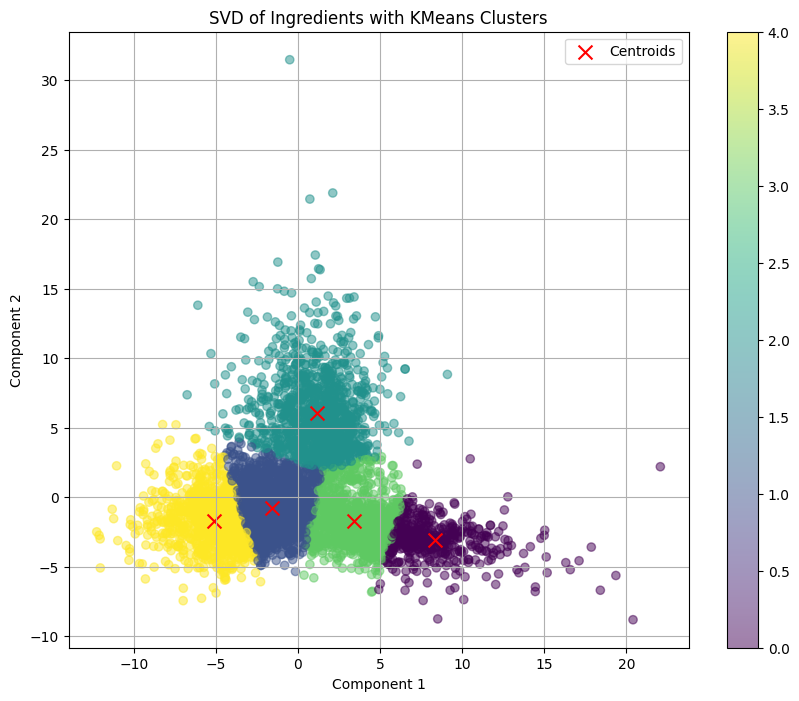

In [25]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the ingredient matrix from the CSV file
ingredient_matrix = pd.read_csv('/content/ingredient_matrix.csv')

# Scale the ingredient matrix
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(ingredient_matrix)

# Perform dimensionality reduction using TruncatedSVD for sparse data
def perform_svd(matrix, n_components=2):
    svd = TruncatedSVD(n_components=n_components)
    svd_matrix = svd.fit_transform(matrix)
    return svd_matrix

# Apply KMeans clustering on SVD-transformed data
def apply_kmeans(svd_matrix, n_clusters=5):
    # Determine the number of clusters based on the data size
    n_clusters = min(n_clusters, svd_matrix.shape[0])
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(svd_matrix)
    return kmeans.labels_, kmeans.cluster_centers_

# Plot the SVD results with clusters
def plot_svd_clusters(svd_matrix, labels, cluster_centers, n_clusters=5):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(svd_matrix[:, 0], svd_matrix[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.colorbar(scatter)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('SVD of Ingredients with KMeans Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
svd_matrix = perform_svd(scaled_matrix, n_components=2)  # Use perform_svd for dimensionality reduction
labels, cluster_centers = apply_kmeans(svd_matrix)  # Apply KMeans on the SVD matrix
plot_svd_clusters(svd_matrix, labels, cluster_centers, n_clusters=len(cluster_centers))  # Plot the results


In [26]:
import pandas as pd

# Load the dataset with English-only ingredients
df = pd.read_csv('/content/english_only_recipes.csv')

# Define the recommendation function
def recommend_recipes_by_keywords(Ingredients_list, df):
    recommendations = []
    # Convert all entries in 'cleaned_ingredients' column to strings and fill NaNs with empty string
    df['cleaned_ingredients'] = df['cleaned_ingredients'].fillna('').astype(str)

    for index, row in df.iterrows():
        # Check if all ingredients are in the recipe's ingredients
        if all(Ingredient.lower() in row['cleaned_ingredients'].lower() for Ingredient in Ingredients_list):
            recommendations.append(row['Cuisine'])

    return recommendations

# Example usage
user_input = ['Chicken']
recommended_cuisines = recommend_recipes_by_keywords(user_input, df)  # Make sure df is your DataFrame
print("Recommended cuisines based on input:", recommended_cuisines)


Recommended cuisines based on input: ['Andhra', 'Chettinad', 'South Indian Recipes', 'Asian', 'North Indian Recipes', 'Indian', 'Mexican', 'Asian', 'Middle Eastern', 'Fusion', 'Continental', 'Indian', 'Middle Eastern', 'Indian', 'Chettinad', 'Continental', 'Indian', 'Kashmiri', 'Continental', 'Chinese', 'Continental', 'Kerala Recipes', 'Continental', 'Goan Recipes', 'Kashmiri', 'Chinese', 'Mexican', 'Cantonese', 'Kerala Recipes', 'Karnataka', 'Indian', 'Continental', 'Indian', 'Hyderabadi', 'Andhra', 'Italian Recipes', 'Mexican', 'North Indian Recipes', 'Kashmiri', 'North Indian Recipes', 'Italian Recipes', 'North Indian Recipes', 'Indian', 'Tamil Nadu', 'Kerala Recipes', 'North Indian Recipes', 'Indo Chinese', 'Italian Recipes', 'American', 'Indian', 'Tamil Nadu', 'Indian', 'Indian', 'South Indian Recipes', 'Caribbean', 'Japanese', 'Tamil Nadu', 'Mughlai', 'Vietnamese', 'Continental', 'North Indian Recipes', 'Chinese', 'Middle Eastern', 'Greek', 'Asian', 'Mexican', 'Rajasthani', 'Indi

In [27]:
import pandas as pd
from gensim.models import Word2Vec
import re

# Load the dataset
df = pd.read_csv('/content/english_only_recipes.csv')

# Ensure 'cleaned_ingredients' contains lists of words
def preprocess_ingredients(text):
    # Replace commas and hyphens with spaces, then split the text into words
    tokens = [token.strip() for token in text.replace(',', ' ').replace('-', ' ').split() if token]
    return tokens

# Apply preprocessing to the 'cleaned_ingredients' column
df['ingredient_tokens'] = df['cleaned_ingredients'].apply(preprocess_ingredients)

# Verify the format
print(df['ingredient_tokens'].head())

# Create the Word2Vec model
model = Word2Vec(sentences=df['ingredient_tokens'], vector_size=100, window=5, min_count=1, sg=1)

# Function to find similar ingredients
def get_similar_ingredients(ingredient, top_n=5):
    try:
        # Use 'topn' instead of 'top_n'
        return model.wv.most_similar(ingredient, topn=top_n)
    except KeyError:
        return []

# Example usage
similar_ingredients = get_similar_ingredients('chicken')
print("Similar ingredients to 'chicken':", similar_ingredients)


0    [karela, (bitter, gourd/, pavakkai), deseeded,...
1    [cups, rice, vermicelli, noodles, (thin), onio...
2    [grams, chicken, onion, chopped, tomato, chopp...
3    [cup, rice, soaked, for, minutes, cup, yellow,...
4    [grams, vellai, poosanikai, (ash, gourd/white,...
Name: ingredient_tokens, dtype: object
Similar ingredients to 'chicken': [('boneless', 0.890254020690918), ('breasts', 0.8888070583343506), ('mutton', 0.7705308794975281), ('legs', 0.7455794215202332), ('bones', 0.7420904040336609)]


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data_path = '/content/english_only_recipes.csv'
df = pd.read_csv(data_path)

# Preprocess data: Join ingredients into a single string
df['ingredient_string'] = df['cleaned_ingredients'].fillna('')

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
ingredient_matrix = vectorizer.fit_transform(df['ingredient_string'])

# Function to recommend recipes based on user input
def recommend_recipes(user_input, num_recommendations=5):
    # Join user input list into a single string
    user_input_str = ' '.join(user_input)

    # Transform user input into vector using TF-IDF vectorizer
    user_input_vector = vectorizer.transform([user_input_str])

    # Compute similarity scores
    similarity_scores = cosine_similarity(user_input_vector, ingredient_matrix)
    similarity_scores = similarity_scores.flatten()

    # Get indices of top recommendations
    top_indices = similarity_scores.argsort()[-num_recommendations:][::-1]

    # Return top recommended recipes
    # Include desired columns 'PrepTimeInMins' and 'Instructions'
    return df.iloc[top_indices][['RecipeName', 'Cuisine', 'cleaned_ingredients', 'PrepTimeInMins', 'Instructions']]

# Example usage:
user_input = ['chicken', 'tomato', 'rice']
recommendations = recommend_recipes(user_input)
print(recommendations[['RecipeName', 'Cuisine', 'cleaned_ingredients', 'PrepTimeInMins', 'Instructions']])

                                   RecipeName               Cuisine  \
1743               Chicken Malai Kabab Recipe  North Indian Recipes   
4425             Peanut Butter Chicken Recipe                 Asian   
2528  Slow Cooker Mexican Chicken Stew Recipe               Mexican   
2925      Restaurant Style Chicken 555 Recipe                Indian   
4651      Chicken Mole With Brown Rice Recipe               Mexican   

                                    cleaned_ingredients  PrepTimeInMins  \
1743  chicken boneless teaspoon ginger garlic paste ...              10   
4425  grams chicken breasts boneless onion tomato cu...              10   
2528  grams chicken thighs shredded carrots (gajjar)...               0   
2925  grams chicken chopped tablespoon red chilli po...              10   
4651  grams chicken cup homemade mole sauce cup brow...              10   

                                           Instructions  
1743  To begin making the Chicken Malai Kabab recipe...  
4425  

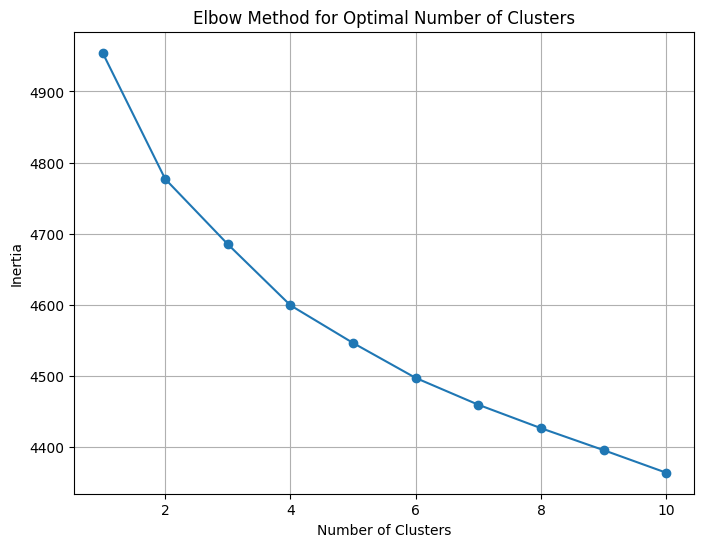

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to plot the Elbow Method graph
def plot_elbow_method(matrix, max_clusters=10):
    inertia = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)  # Explicitly set n_init
        kmeans.fit(matrix)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

# Plot the Elbow Method graph
plot_elbow_method(ingredient_matrix)


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

# Download nltk resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
data_path = '/content/english_only_recipes.csv'
df = pd.read_csv(data_path)

# Clean and preprocess data
def preprocess_ingredients(ingredients):
    lemmatizer = WordNetLemmatizer()
    custom_stopwords = set(stopwords.words('english')).union({'fresh', 'chopped', 'sliced', 'diced', 'large', 'small', 'medium', 'extra', 'extra-virgin', 'virgin'})

    ingredient = ingredients.lower()
    ingredient = re.sub(r'[^a-z\s]', '', ingredient)
    tokens = [lemmatizer.lemmatize(word) for word in ingredient.split() if word not in custom_stopwords]

    return ' '.join(tokens)

df['cleaned_ingredients'] = df['Ingredients'].apply(preprocess_ingredients)

# Vectorization with n-grams
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
ingredient_matrix = vectorizer.fit_transform(df['cleaned_ingredients'])

# Recommendation function
def recommend_recipes(user_input, num_recommendations=5):
    user_input_str = ' '.join(user_input)
    user_input_vector = vectorizer.transform([user_input_str])
    similarity_scores = cosine_similarity(user_input_vector, ingredient_matrix)
    similarity_scores = similarity_scores.flatten()
    top_indices = similarity_scores.argsort()[-num_recommendations:][::-1]
    return df.iloc[top_indices]

# Example usage
user_input = ['chicken', 'tomato', 'rice']
recommendations = recommend_recipes(user_input)

print("Recommended Recipes:")
print(recommendations[['RecipeName', 'Cuisine', 'cleaned_ingredients']])

# Evaluate precision and relevance
def evaluate_precision_at_n(user_input, relevant_cuisine, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    relevant_recommendations = recommendations[recommendations['Cuisine'] == relevant_cuisine]
    precision_at_n = len(relevant_recommendations) / n
    return precision_at_n

def evaluate_most_relevant_cuisine(user_input, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    cuisine_counts = recommendations['Cuisine'].value_counts()
    most_relevant_cuisine = cuisine_counts.idxmax()
    precision_at_n = cuisine_counts.max() / n
    return most_relevant_cuisine, precision_at_n

most_relevant_cuisine, precision = evaluate_most_relevant_cuisine(user_input, n=5)
print(f'Most Relevant Cuisine: {most_relevant_cuisine}')
print(f'Precision@5 for {most_relevant_cuisine}: {precision:.2f}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Recommended Recipes:
                                       RecipeName                   Cuisine  \
4428  Naga Style Chicken With Bamboo Shoot Recipe  North East India Recipes   
5117                Dragon Chicken Sizzler Recipe              Indo Chinese   
5047     Spicy Chicken Curry Recipe In Naga Style                  Nagaland   
2528      Slow Cooker Mexican Chicken Stew Recipe                   Mexican   
1435         Chicken In Tomato Onion Gravy Recipe                    Indian   

                                    cleaned_ingredients  
4428  kg chicken tomato crushed pestle mortar clove ...  
5117  gram chicken chicken gm gram baby corn baby co...  
5047  gram chicken thigh bone tomato green chilli cl...  
2528  gram chicken thigh shredded carrot gajjar cup ...  
1435  gram chicken bite sizesunflower oil cook onion...  
Most Relevant Cuisine: North East India Recipes
Precision@5 for North East India Recipes: 0.20


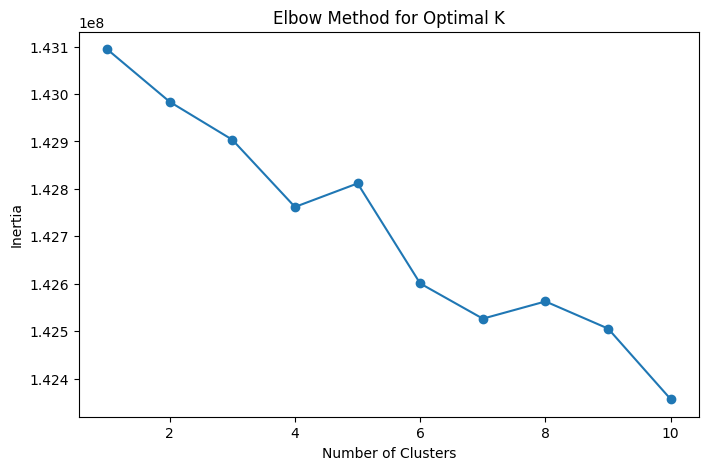

Clustering Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        18
           2       0.00      1.00      0.00         6
           3       0.00      0.00      0.00       105
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00       143
          10       0.00      0.00      0.00        22
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00        61
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Silhouette Score: -0.02
Recommended Recipes:
                            RecipeName      Cuisine  \
5579  Nando's Peri Peri Chicken Recipe  Continental   

                                    cleaned_ingredients  
5579  gram boneless chicken gram nandos peri peri ch...  


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, silhouette_score
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data_path = '/content/english_only_recipes.csv'
df = pd.read_csv(data_path)

# Clean and preprocess data
def preprocess_ingredients(ingredients):
    lemmatizer = WordNetLemmatizer()
    custom_stopwords = set(stopwords.words('english')).union({'fresh', 'chopped', 'sliced', 'diced', 'large', 'small', 'medium', 'extra', 'extra-virgin', 'virgin'})

    ingredient = ingredients.lower()
    ingredient = re.sub(r'[^a-z\s]', '', ingredient)
    tokens = [lemmatizer.lemmatize(word) for word in ingredient.split() if word not in custom_stopwords]

    return ' '.join(tokens)

df['cleaned_ingredients'] = df['Ingredients'].apply(preprocess_ingredients)

# Vectorization with n-grams
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
ingredient_matrix = vectorizer.fit_transform(df['cleaned_ingredients'])

# Scaling the features (optional)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(ingredient_matrix)

# Optional PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
# Convert sparse matrix to dense matrix
X_pca = pca.fit_transform(X_scaled.toarray())

# Determine the optimal number of clusters using the elbow method
def plot_elbow_method(X):
    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.show()

plot_elbow_method(X_pca)

# Based on the elbow method, choose the optimal number of clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans.fit(X_pca)

# Predict clusters
df['Cluster'] = kmeans.predict(X_pca)

# Convert 'Cuisine' column to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
df['Cuisine_Encoded'] = label_encoder.fit_transform(df['Cuisine'])

# Evaluate clustering using encoded labels
print("Clustering Report:")
print(classification_report(df['Cuisine_Encoded'], df['Cluster']))

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Recommendation function
def recommend_recipes(user_input, num_recommendations=5):
    user_input_str = ' '.join(user_input)
    user_input_vector = vectorizer.transform([user_input_str])
    user_input_vector_scaled = scaler.transform(user_input_vector)
    user_input_vector_pca = pca.transform(user_input_vector_scaled.toarray())  # Convert to dense array
    similarity_scores = cosine_similarity(user_input_vector_pca, kmeans.cluster_centers_)
    cluster_index = similarity_scores.flatten().argmax()
    cluster_recipes = df[df['Cluster'] == cluster_index]
    return cluster_recipes.head(num_recommendations)

# Example usage
user_input = ['chicken', 'tomato', 'rice']
recommendations = recommend_recipes(user_input)

print("Recommended Recipes:")
print(recommendations[['RecipeName', 'Cuisine', 'cleaned_ingredients']])


In [32]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
# Import KMeans
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

# Load the dataset
train_data_path = '/content/english_only_recipes.csv'
train_df = pd.read_csv(train_data_path)

# Clean and preprocess data
def preprocess_ingredients(ingredients):
    lemmatizer = WordNetLemmatizer()
    # Reduced the custom stopwords to only include words that don't contribute to recipe identification
    custom_stopwords = set(stopwords.words('english')).union({'fresh', 'extra', 'extra-virgin', 'virgin'})

    ingredients = ingredients.lower()
    ingredients = re.sub(r'[^a-z\s]', '', ingredients)
    tokens = [lemmatizer.lemmatize(word) for word in ingredients.split() if word not in custom_stopwords]

    return ' '.join(tokens) # Return the joined string directly

# Create the cleaned_ingredients column
train_df['cleaned_ingredients'] = train_df['Ingredients'].apply(preprocess_ingredients)

# Prepare the data and vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(train_df['cleaned_ingredients'])

# Initialize KMeans
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)

# Perform manual cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]

    # Fit KMeans on the train split
    kmeans.fit(X_train)

    # Predict clusters on the test split
    labels = kmeans.predict(X_test)

    # Calculate silhouette score on the test split
    score = silhouette_score(X_test, labels, metric='euclidean')
    cv_scores.append(score)

# Output the scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {sum(cv_scores) / len(cv_scores)}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cross-Validation Scores: [0.011647047235796931, 0.011983392742341477, 0.010655743658836633, 0.010471601337074053, 0.011620955760684282]
Average Cross-Validation Score: 0.011275748146946676


In [33]:
!pip install nltk gensim scikit-learn


In [40]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import numpy as np

# Load the dataset
train_data_path = '/content/english_only_recipes.csv'
train_df = pd.read_csv(train_data_path)

# Synonym mapping for common ingredients
synonyms = {
    'tomato': 'tomatoes',
    'onion': 'onions',
    'garlic': 'garlic cloves',
    'potato': 'potatoes',
    'carrot': 'carrots',
}

# Preprocessing function with synonyms and stopword removal
def preprocess_ingredients(ingredients):
    lemmatizer = WordNetLemmatizer()
    custom_stopwords = set(stopwords.words('english')).union({'fresh', 'chopped', 'sliced', 'diced', 'large', 'small', 'medium', 'extra', 'extra-virgin', 'virgin'})

    cleaned_ingredients = []
    for ingredient in ingredients:
        ingredient = ingredient.lower()
        ingredient = re.sub(r'[^a-z\s]', '', ingredient)
        tokens = [lemmatizer.lemmatize(word) for word in ingredient.split() if word not in custom_stopwords]

        # Apply synonym mapping
        tokens = [synonyms.get(token, token) for token in tokens]

        cleaned_ingredients.append(' '.join(tokens))

    return ' '.join(cleaned_ingredients)

train_df['cleaned_ingredients'] = train_df['Ingredients'].apply(preprocess_ingredients)

# Word2Vec Embedding Model (Train on cleaned ingredients)
def tokenize_ingredients(ingredients):
    return ingredients.split()

train_df['tokenized_ingredients'] = train_df['cleaned_ingredients'].apply(tokenize_ingredients)

# Train Word2Vec model
w2v_model = Word2Vec(sentences=train_df['tokenized_ingredients'], vector_size=100, window=5, min_count=1, workers=4)

# Function to compute recipe embeddings by averaging Word2Vec vectors
def get_recipe_embedding(tokens, model):
    valid_tokens = [token for token in tokens if token in model.wv]
    if len(valid_tokens) == 0:
        return np.zeros(model.vector_size) # Return a zero vector if no valid tokens are found
    return sum(model.wv[token] for token in valid_tokens) / len(valid_tokens)

train_df['embedding'] = train_df['tokenized_ingredients'].apply(lambda x: get_recipe_embedding(x, w2v_model))

# Convert list of embeddings to matrix format
embedding_matrix = train_df['embedding'].tolist()

# Cluster-based Recommendation using KMeans
num_clusters = 50  # Choose optimal number of clusters based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_df['cluster'] = kmeans.fit_predict(embedding_matrix)

# Recommendation function using Word2Vec and clustering
def recommend_recipes(user_input, num_recommendations=5, metric='cosine'):
    # Preprocess the user input
    cleaned_input = preprocess_ingredients(user_input)
    tokenized_input = cleaned_input.split()

    # Convert user input to embedding
    user_embedding = get_recipe_embedding(tokenized_input, w2v_model) # Call the function with the tokenized input and model

    # Find the nearest cluster
    user_cluster = kmeans.predict([user_embedding])[0]

    # Filter recipes in the same cluster
    cluster_recipes = train_df[train_df['cluster'] == user_cluster]
    cluster_embeddings = np.vstack(cluster_recipes['embedding'].values)

    # Compute similarity scores
    if metric == 'cosine':
        similarity_scores = cosine_similarity([user_embedding], cluster_embeddings).flatten()
    elif metric == 'euclidean':
        similarity_scores = euclidean_distances([user_embedding], cluster_embeddings).flatten()

    # Get top-n recommendations
    top_indices = similarity_scores.argsort()[-num_recommendations:][::-1]

    return cluster_recipes.iloc[top_indices]

# Example usage
user_input = ['chicken', 'tomato', 'rice']
recommendations = recommend_recipes(user_input)

print("Recommended Recipes:")
print(recommendations[['Cuisine', 'Ingredients']])

# Evaluate precision and relevance
def evaluate_precision_at_n(user_input, relevant_cuisine, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    relevant_recommendations = recommendations[recommendations['cuisine'] == relevant_cuisine]
    precision_at_n = len(relevant_recommendations) / n
    return precision_at_n

def evaluate_most_relevant_cuisine(user_input, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    cuisine_counts = recommendations['Cuisine'].value_counts()
    most_relevant_cuisine = cuisine_counts.idxmax()
    precision_at_n = cuisine_counts.max() / n
    return most_relevant_cuisine, precision_at_n

most_relevant_cuisine, precision = evaluate_most_relevant_cuisine(user_input, n=5)
print(f'Most Relevant Cuisine: {most_relevant_cuisine}')
print(f'Precision@5 for {most_relevant_cuisine}: {precision:.2f}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Recommended Recipes:
                   Cuisine                                        Ingredients
5539  North Indian Recipes  1 कप गोबी - बारीक कटी हुई,1 गाजर - पतली कटी हु...
5277        Kerala Recipes  1 आलू - छीलकर लम्बा काट ले,1 गाजर - छीलकर लम्ब...
5139                Indian  2 कप पत्ता गोभी - कस ले,1/2 कप बेसन,1 हरी मिर्...
4895           Continental  10 to 12 स्ट्रॉबेरी - काट ले,1 प्याज - छोटा,1 ...
3992                Indian  2 कप गेहूं का आटा,1 कप हरे मटर,5 to 6 हरी मिर्...
Most Relevant Cuisine: Indian
Precision@5 for Indian: 0.40


In [41]:
!pip install nltk gensim scikit-learn


In [47]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.preprocessing import LabelEncoder

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
train_data_path = '/content/english_only_recipes.csv'
train_df = pd.read_csv(train_data_path)

# Print columns to debug
print("Columns in train_df:", train_df.columns)

# Inspect the first few rows
print("First few rows of train_df:")
print(train_df.head())

# Clean and preprocess data
def preprocess_ingredients(ingredients):
    lemmatizer = WordNetLemmatizer()
    # Reduced the custom stopwords
    custom_stopwords = set(stopwords.words('english')).union({'fresh', 'extra', 'extra-virgin', 'virgin'})

    cleaned_ingredients = []
    for ingredient in ingredients.split(','): # Split ingredients by comma
        ingredient = ingredient.lower()
        ingredient = re.sub(r'[^a-z\s]', '', ingredient)
        tokens = [lemmatizer.lemmatize(word) for word in ingredient.split() if word not in custom_stopwords]
        if tokens: # Only add if there are tokens left
            cleaned_ingredients.append(' '.join(tokens))

    return ' '.join(cleaned_ingredients)

train_df['cleaned_ingredients'] = train_df['Ingredients'].apply(preprocess_ingredients)

# Vectorization with n-grams
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
ingredient_matrix = vectorizer.fit_transform(train_df['cleaned_ingredients'])

# KMeans clustering
optimal_clusters = 5  # Adjust this based on your cluster analysis
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans.fit(ingredient_matrix)

# Assign clusters to the dataset
train_df['cluster'] = kmeans.predict(ingredient_matrix)

# Recommendation function
def recommend_recipes(user_input, num_recommendations=5):
    user_input_str = ' '.join(user_input)
    user_input_vector = vectorizer.transform([user_input_str])
    similarity_scores = cosine_similarity(user_input_vector, ingredient_matrix)
    similarity_scores = similarity_scores.flatten()
    top_indices = similarity_scores.argsort()[-num_recommendations:][::-1]
    return train_df.iloc[top_indices]

# Example usage
user_input = ['chicken', 'tomato', 'rice']
recommendations = recommend_recipes(user_input)

print("Recommended Recipes:")
print(recommendations[['Cuisine', 'Ingredients']])  # Ensure column name 'cuisine' is correct

# Evaluate precision and relevance
def evaluate_precision_at_n(user_input, relevant_cuisine, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    relevant_recommendations = recommendations[recommendations['Cuisine'] == relevant_cuisine]  # Ensure column name 'cuisine' is correct
    precision_at_n = len(relevant_recommendations) / n
    return precision_at_n

def evaluate_most_relevant_cuisine(user_input, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    cuisine_counts = recommendations['Cuisine'].value_counts()  # Ensure column name 'cuisine' is correct
    most_relevant_cuisine = cuisine_counts.idxmax()
    precision_at_n = cuisine_counts.max() / n # Calculate precision
    return most_relevant_cuisine, precision_at_n # Return the cuisine and precision

most_relevant_cuisine, precision = evaluate_most_relevant_cuisine(user_input, n=5)
print(f'Most Relevant Cuisine: {most_relevant_cuisine}')
print(f'Precision@5 for {most_relevant_cuisine}: {precision:.2f}')

# Evaluate clustering performance (only if 'cuisine' labels are available)
def evaluate_model(true_labels, predictions):
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    return precision, recall, f1

# Sample test dataset for evaluation
test_data_path = '/content/english_only_recipes.csv'
test_df = pd.read_csv(test_data_path)

# Print columns to debug
print("Columns in test_df:", test_df.columns)

# Inspect the first few rows
print("First few rows of test_df:")
print(test_df.head())

# Preprocess test data
test_df['cleaned_ingredients'] = test_df['Ingredients'].apply(preprocess_ingredients)
# Vectorize test data
test_matrix = vectorizer.transform(test_df['cleaned_ingredients'])
# Predict clusters for test data
test_df['cluster'] = kmeans.predict(test_matrix)

# Check the column names for clustering evaluation
print("Columns in test_df after clustering:", test_df.columns)

# If 'cuisine' labels are not available, we cannot evaluate clustering performance directly.
# If you have true labels for test_df, you would need to add them or merge with train_df if possible.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Columns in train_df: Index(['Srno', 'RecipeName', 'TranslatedRecipeName', 'Ingredients',
       'TranslatedIngredients', 'PrepTimeInMins', 'CookTimeInMins',
       'TotalTimeInMins', 'Servings', 'Cuisine', 'Course', 'Diet',
       'Instructions', 'TranslatedInstructions', 'URL', 'cleaned_ingredients'],
      dtype='object')
First few rows of train_df:
   Srno                                         RecipeName  \
0     1                               Masala Karela Recipe   
1     3  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
2     4  Gongura Chicken Curry Recipe - Andhra Style Go...   
3     6  Pudina Khara Pongal Recipe (Rice and Lentils C...   
4     7         Udupi Style Ash Gourd Coconut Curry Recipe   

                                TranslatedRecipeName  \
0                               Masala Karela Recipe   
1  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
2  Gongura Chicken Curry Recipe - Andhra Style Go...   
3  Pudina Khara Pongal Recipe (Rice and Lentils C

In [49]:
from sklearn.decomposition import PCA, TruncatedSVD # import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

# Advanced Vectorization (Word Embeddings Example)
# Use pre-trained embeddings like GloVe or FastText here

# Dimensionality Reduction
# pca = PCA(n_components=50)
# reduced_matrix = pca.fit_transform(ingredient_matrix)
svd = TruncatedSVD(n_components=50) # Use TruncatedSVD for dimensionality reduction of sparse matrix
reduced_matrix = svd.fit_transform(ingredient_matrix) # Apply TruncatedSVD

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(reduced_matrix)

# Clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(tsne_results)

# Evaluate Clustering
silhouette_avg = silhouette_score(tsne_results, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Add clusters to DataFrame
train_df['cluster'] = clusters

# Manual Inspection (example)
for cluster in range(max(clusters)+1):
    cluster_data = train_df[train_df['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data[['Cuisine', 'Ingredients']].head())

Silhouette Score: -0.72
Cluster 0:
                   Cuisine                                        Ingredients
68          Kerala Recipes  1-1/2 cups Curd (Dahi / Yogurt) - thick,1/2 cu...
654   North Indian Recipes  500 grams Colocasia root (Arbi) - skin peeled ...
767         Kerala Recipes  4 Mango (Ripe),2 Green Chillies - sliced lengt...
1931        Kerala Recipes  2 cups Curd (Dahi / Yogurt),1-1/2 cups Water,5...
4703  South Indian Recipes  1 Mango (Ripe) - peeled and chopped into big p...
Cluster 1:
                  Cuisine                                        Ingredients
84   South Indian Recipes  1 छोटा चमच्च तेल,1 छोटा चमच्च राइ,1 शिमला मिर्...
213             Karnataka  1 कप इमली का पेस्ट,1/2 कप गुड़,1 छोटा चमच्च रसम...
334  South Indian Recipes  1 कप ब्लैक चावल - पका ले,तेल - या घी,1/3 छोटा ...
432                Indian  2 कप चावल - पका ले,1 छोटा चमच्च जीरा,3 to 4 कढ़...
705              Kashmiri  1 कप कमल ककड़ी - (लोटस स्टेम),2 कप दही,1 बड़ा चम...
Cluster 2:
             

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Assuming 'labels' contains the true labels for your clustered data (train_df)
# Ensure that 'labels' has the same length as 'clusters' (5766)

# Convert true labels to numerical format if they are strings
label_encoder = LabelEncoder()
# Fit the label encoder on the entire dataset's labels if available
true_labels_encoded = label_encoder.fit_transform(train_df['Cuisine']) # Use the 'Cuisine' column from train_df

# Calculate Purity Score
def purity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

# Calculate purity using the encoded labels from train_df and the predicted clusters
purity = purity_score(true_labels_encoded, clusters)
print(f'Purity Score: {purity:.2f}')

Purity Score: 0.18


In [59]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
train_data_path = '/content/english_only_recipes.csv'
train_df = pd.read_csv(train_data_path)

# Print columns to debug
print(f"Columns in train_df: {train_df.columns}")
print(f"First few rows of train_df:\n{train_df.head()}")

# Clean and preprocess data
def preprocess_ingredients(ingredients):
    lemmatizer = WordNetLemmatizer()
    # Reduced the custom stopwords and removed regex
    custom_stopwords = set(stopwords.words('english')).union({'fresh','extra', 'extra-virgin', 'virgin'})

    cleaned_ingredients = []
    for ingredient in ingredients.split(','): # Split ingredients by comma
        ingredient = ingredient.lower()
        tokens = [lemmatizer.lemmatize(word) for word in ingredient.split() if word not in custom_stopwords]
        if tokens: # Only add if there are tokens left
            cleaned_ingredients.append(' '.join(tokens))

    return ' '.join(cleaned_ingredients)

train_df['cleaned_ingredients'] = train_df['Ingredients'].apply(preprocess_ingredients)

# Check for empty ingredients after preprocessing
empty_ingredients = train_df[train_df['cleaned_ingredients'] == '']
if not empty_ingredients.empty:
    print(f"Recipes with empty ingredients after preprocessing:\n{empty_ingredients}")
    # Handle empty ingredients (e.g., remove or replace with a placeholder)
    train_df = train_df[train_df['cleaned_ingredients'] != '']

# Vectorization with n-grams
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
ingredient_matrix = vectorizer.fit_transform(train_df['cleaned_ingredients'])

# KMeans clustering
optimal_clusters = 5  # Adjust this based on your cluster analysis
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans.fit(ingredient_matrix)

# Assign clusters to the dataset
train_df['cluster'] = kmeans.predict(ingredient_matrix)

# Recommendation function
def recommend_recipes(user_input, num_recommendations=5):
    user_input_str = ' '.join(user_input)
    user_input_vector = vectorizer.transform([user_input_str])
    similarity_scores = cosine_similarity(user_input_vector, ingredient_matrix)
    similarity_scores = similarity_scores.flatten()
    top_indices = similarity_scores.argsort()[-num_recommendations:][::-1]
    return train_df.iloc[top_indices]

# Example usage
user_input = ['chicken', 'tomato', 'rice']
recommendations = recommend_recipes(user_input)

print("Recommended Recipes:")
print(recommendations[['Cuisine', 'Ingredients']])  # Adjust column names if needed

# Evaluate precision and relevance
def evaluate_precision_at_n(user_input, relevant_cuisine, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    relevant_recommendations = recommendations[recommendations['# Adjust column names if needed'] == relevant_cuisine]
    precision_at_n = len(relevant_recommendations) / n
    return precision_at_n

def evaluate_most_relevant_cuisine(user_input, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    cuisine_counts = recommendations['Cuisine'].value_counts()  # Adjust column names if needed
    most_relevant_cuisine = cuisine_counts.idxmax()
    precision_at_n = cuisine_counts.max() / n
    return most_relevant_cuisine, precision_at_n

most_relevant_cuisine, precision = evaluate_most_relevant_cuisine(user_input, n=5)
print(f'Most Relevant Cuisine: {most_relevant_cuisine}')
print(f'Precision@5 for {most_relevant_cuisine}: {precision:.2f}')

# Sample test dataset for evaluation
test_data_path = '/content/cleaned_recipes.csv'
test_df = pd.read_csv(test_data_path)

# Check columns and print first few rows
print(f"Columns in test_df: {test_df.columns}")
print(f"First few rows of test_df:\n{test_df.head()}")

# Preprocess test data
# Check if 'Ingredients' column exists and handle missing values
if 'Ingredients' in test_df.columns:
    test_df['cleaned_ingredients'] = test_df['Ingredients'].fillna('').astype(str).apply(preprocess_ingredients)
else:
    print("Ingredients column not found in test_df")

# Vectorize test data using the same TF-IDF vectorizer
test_matrix = vectorizer.transform(test_df['cleaned_ingredients'])

# Predict clusters for test data
test_df['cluster'] = kmeans.predict(test_matrix)

# Evaluate clustering performance
# Evaluate clustering performance
def evaluate_model(true_labels, predictions):
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    return precision, recall, f1

# If true labels are not available, use alternative metrics
if 'Cuisine' not in test_df.columns:
    # Convert sparse matrix to dense
    test_matrix_dense = test_matrix.toarray()

    silhouette_avg = silhouette_score(test_matrix_dense, test_df['cluster'])
    calinski_harabasz_avg = calinski_harabasz_score(test_matrix_dense, test_df['cluster'])
    davies_bouldin_avg = davies_bouldin_score(test_matrix_dense, test_df['cluster'])

    print(f'Silhouette Score: {silhouette_avg:.2f}')
    print(f'Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}')
    print(f'Davies-Bouldin Index: {davies_bouldin_avg:.2f}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Columns in train_df: Index(['Srno', 'RecipeName', 'TranslatedRecipeName', 'Ingredients',
       'TranslatedIngredients', 'PrepTimeInMins', 'CookTimeInMins',
       'TotalTimeInMins', 'Servings', 'Cuisine', 'Course', 'Diet',
       'Instructions', 'TranslatedInstructions', 'URL', 'cleaned_ingredients'],
      dtype='object')
First few rows of train_df:
   Srno                                         RecipeName  \
0     1                               Masala Karela Recipe   
1     3  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
2     4  Gongura Chicken Curry Recipe - Andhra Style Go...   
3     6  Pudina Khara Pongal Recipe (Rice and Lentils C...   
4     7         Udupi Style Ash Gourd Coconut Curry Recipe   

                                TranslatedRecipeName  \
0                               Masala Karela Recipe   
1  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
2  Gongura Chicken Curry Recipe - Andhra Style Go...   
3  Pudina Khara Pongal Recipe (Rice and Lentils C

In [60]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Example: Training your model
# Assume train_df and ingredient_matrix are already defined

# Train the model
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
ingredient_matrix = vectorizer.fit_transform(train_df['cleaned_ingredients'])
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(ingredient_matrix)

# Save the model and vectorizer
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Load the model and vectorizer
with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Example: Making predictions with the loaded model
user_input = ['chicken', 'tomato', 'rice']
user_input_str = ' '.join(user_input)
user_input_vector = vectorizer.transform([user_input_str])
clusters = kmeans.predict(user_input_vector)
print(clusters)


[3]


In [62]:
#Verify Model Training Output

# Print the cluster centers to ensure the model has been trained
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Get the cluster labels for the training data
train_labels = kmeans.labels_
print("\nCluster labels for training data:\n", train_labels[:10])  # Print the first 10 labels


Cluster Centers:
 [[8.72865215e-03 3.47812060e-04 4.11628587e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.75189056e-03 1.04668662e-03 3.18306973e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86413745e-03 1.17621831e-04 1.09167121e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.61852884e-03 7.36222323e-04 0.00000000e+00 ... 4.89474736e-05
  7.15640203e-05 7.15640203e-05]
 [6.84719493e-03 2.30880945e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Cluster labels for training data:
 [2 0 2 0 0 1 4 1 1 0]


In [63]:
#Test with a Known Example

# Test case: Example with user input
user_input = ['chicken', 'tomato', 'rice']
user_input_str = ' '.join(user_input)

# Transform the input using the loaded vectorizer
user_input_vector = vectorizer.transform([user_input_str])

# Predict the cluster using the KMeans model
predicted_cluster = kmeans.predict(user_input_vector)
print(f"The input ingredients {user_input} belong to cluster: {predicted_cluster[0]}")


The input ingredients ['chicken', 'tomato', 'rice'] belong to cluster: 3


In [64]:
#Check Predictions on Training Data

print("\nExample predictions for a few training recipes:")
for i in range(3):
    recipe = train_df['cleaned_ingredients'].iloc[i]
    recipe_vector = vectorizer.transform([recipe])
    recipe_cluster = kmeans.predict(recipe_vector)
    print(f"Recipe: {recipe[:50]}... -> Cluster: {recipe_cluster[0]}")



Example predictions for a few training recipes:
Recipe: 6 karela (bitter gourd/ pavakkai) - deseeded salt ... -> Cluster: 2
Recipe: 1-1/2 cup rice vermicelli noodle (thin) 1 onion - ... -> Cluster: 0
Recipe: 500 gram chicken 2 onion - chopped 1 tomato - chop... -> Cluster: 2


In [65]:
#Check Clustering Consistency

# Test with similar ingredients
similar_input_1 = ['chicken', 'rice', 'pepper']
similar_input_2 = ['tomato', 'chicken', 'onion']

# Transform and predict for similar inputs
similar_vector_1 = vectorizer.transform([' '.join(similar_input_1)])
similar_vector_2 = vectorizer.transform([' '.join(similar_input_2)])

cluster_1 = kmeans.predict(similar_vector_1)
cluster_2 = kmeans.predict(similar_vector_2)

print(f"Cluster for ingredients {similar_input_1}: {cluster_1[0]}")
print(f"Cluster for ingredients {similar_input_2}: {cluster_2[0]}")


Cluster for ingredients ['chicken', 'rice', 'pepper']: 1
Cluster for ingredients ['tomato', 'chicken', 'onion']: 1


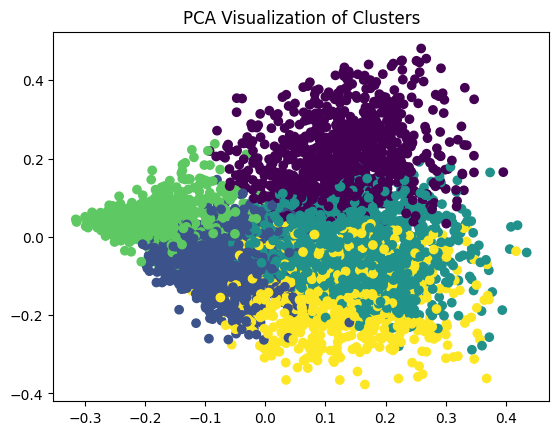

In [66]:
#Visualize the Clusters (Optional)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
ingredient_matrix_2d = pca.fit_transform(ingredient_matrix.toarray())

# Plot the clusters
plt.scatter(ingredient_matrix_2d[:, 0], ingredient_matrix_2d[:, 1], c=train_labels, cmap='viridis')
plt.title("PCA Visualization of Clusters")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Problem Statement:
The goal is to build a recommendation system for recipes based on ingredients, and to evaluate clustering performance using various metrics.
Columns in df: Index(['Srno', 'RecipeName', 'TranslatedRecipeName', 'Ingredients',
       'TranslatedIngredients', 'PrepTimeInMins', 'CookTimeInMins',
       'TotalTimeInMins', 'Servings', 'Cuisine', 'Course', 'Diet',
       'Instructions', 'TranslatedInstructions', 'URL', 'cleaned_ingredients'],
      dtype='object')
First few rows of df:
   Srno                                         RecipeName  \
0     1                               Masala Karela Recipe   
1     3  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
2     4  Gongura Chicken Curry Recipe - Andhra Style Go...   
3     6  Pudina Khara Pongal Recipe (Rice and Lentils C...   
4     7         Udupi Style Ash Gourd Coconut Curry Recipe   

                                TranslatedRecipeName  \
0                               Masala Karela Recipe   
1  Ragi Semiy

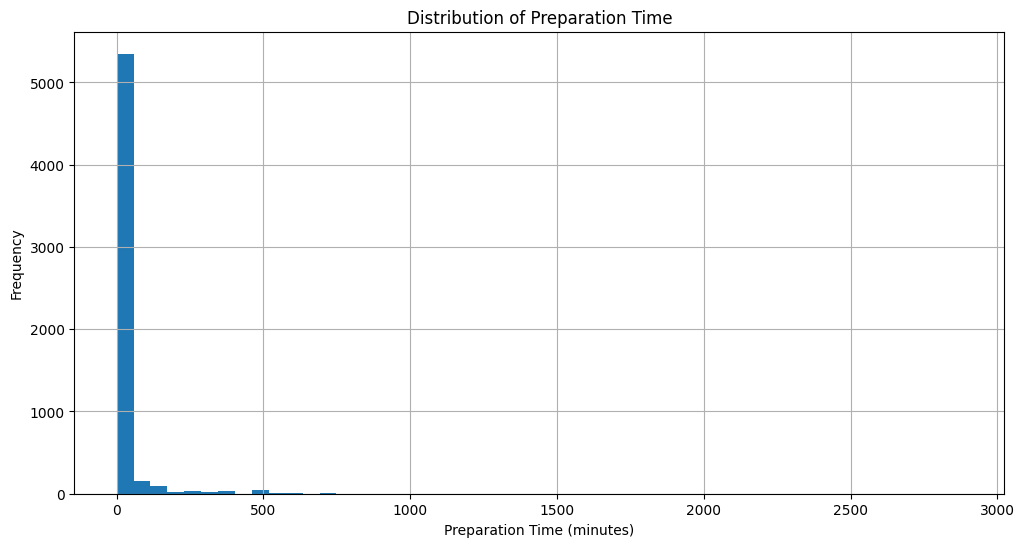

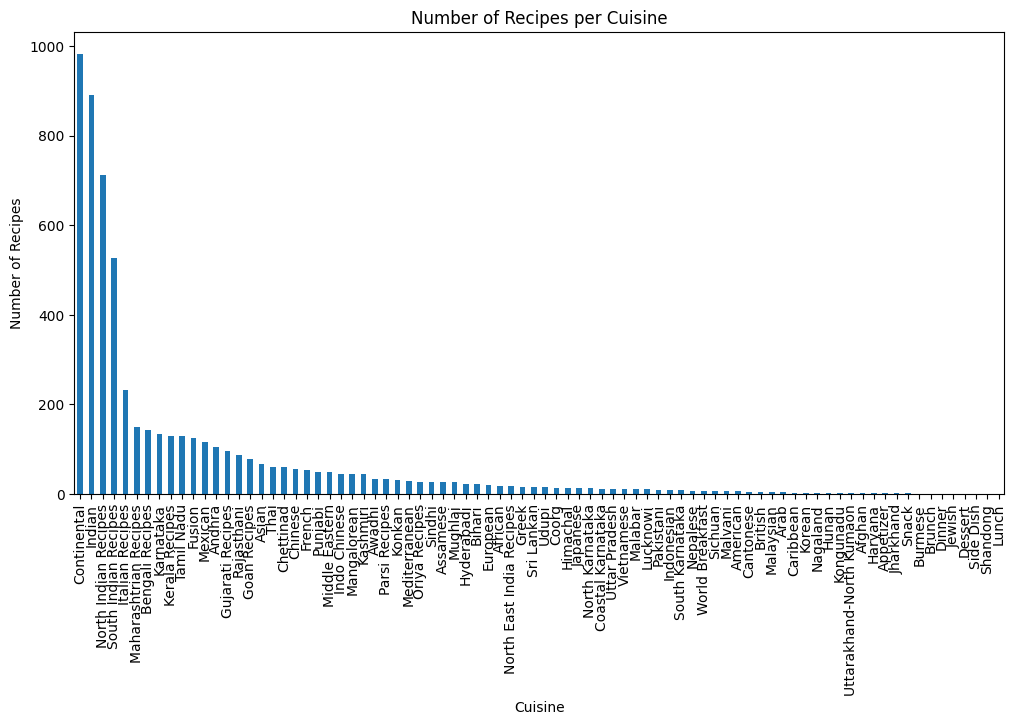


Recommended Recipes:
                       Cuisine  \
4428  North East India Recipes   
4591                   Malabar   
3816      North Indian Recipes   
4205                    Indian   
1796      North Indian Recipes   

                                            Ingredients  \
4428  1 kg Chicken,2 Tomatoes - crushed in pestle & ...   
4591  250 grams Chicken - minced,1 Onion - chopped,4...   
3816  500 grams Chicken,1 tablespoon Red Chilli powd...   
4205  1 cup Rice flour,1-1/2 cups Water,Salt - to ta...   
1796  2 Chicken breasts - cut into cubes,1 teaspoon ...   

                                           Instructions  
4428  To prepare Naga Style Chicken With Bamboo Shoo...  
4591  To begin making the Malabar Style Kozhi Pidi R...  
3816  To begin making the Coriander Chicken Roast re...  
4205  To prepare Ujju Rotti Recipe (Indian Rice Flat...  
1796  To begin making the Hariyali Chicken Tikka Rec...  

Most Relevant Cuisine: North Indian Recipes
Precision@5 for North Ind

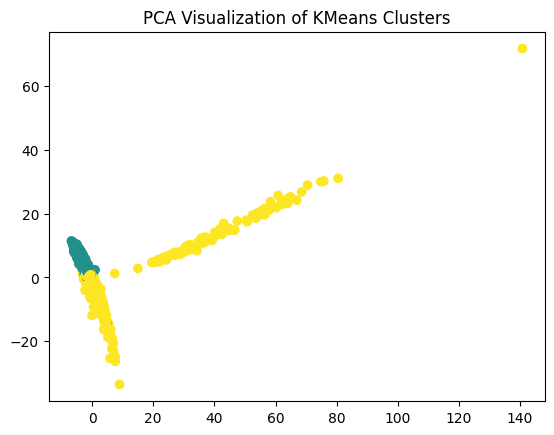

In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
data_path = '/content/english_only_recipes.csv'
df = pd.read_csv(data_path)

# Identifying the Problem
print("Problem Statement:")
print("The goal is to build a recommendation system for recipes based on ingredients, "
      "and to evaluate clustering performance using various metrics.")

# Data Understanding
print("Columns in df:", df.columns)
print("First few rows of df:")
print(df.head())

# Exploratory Data Analysis (EDA)
print("\nEDA Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Data Visualization
plt.figure(figsize=(12, 6))
df['PrepTimeInMins'].hist(bins=50)
plt.title('Distribution of Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
df['Cuisine'].value_counts().plot(kind='bar')
plt.title('Number of Recipes per Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Recipes')
plt.show()

# Handle duplicates and outliers
df = df.drop_duplicates()
# Handle outliers: Remove recipes with extremely high preparation times (e.g., above 1000 minutes)
df = df[df['PrepTimeInMins'] < 1000]

# Data Preprocessing
def preprocess_ingredients(ingredients):
    lemmatizer = WordNetLemmatizer()
    custom_stopwords = set(stopwords.words('english')).union({'fresh', 'extra', 'extra-virgin', 'virgin'})
    cleaned_ingredients = []
    for ingredient in ingredients.split(','):
        ingredient = ingredient.lower()
        tokens = [lemmatizer.lemmatize(word) for word in ingredient.split() if word not in custom_stopwords]
        if tokens:
            cleaned_ingredients.append(' '.join(tokens))
    return ' '.join(cleaned_ingredients)

df['cleaned_ingredients'] = df['Ingredients'].apply(preprocess_ingredients)

# Handle empty ingredients
df = df[df['cleaned_ingredients'] != '']

# Vectorization with n-grams
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
ingredient_matrix = vectorizer.fit_transform(df['cleaned_ingredients'])

# Data Normalization
scaler = StandardScaler(with_mean=False)  # with_mean=False because sparse matrix
ingredient_matrix_scaled = scaler.fit_transform(ingredient_matrix)

# Data Mining: Clustering
# KMeans clustering
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans.fit(ingredient_matrix_scaled)
df['cluster'] = kmeans.predict(ingredient_matrix_scaled)

# Advanced Clustering with DBSCAN
svd = TruncatedSVD(n_components=50)
reduced_matrix = svd.fit_transform(ingredient_matrix_scaled)
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(reduced_matrix)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(tsne_results)
df['dbscan_cluster'] = dbscan_clusters

# Data Mining: Recommendation Function
def recommend_recipes(user_input, num_recommendations=5):
    user_input_str = ' '.join(user_input)
    user_input_vector = vectorizer.transform([user_input_str])
    user_input_vector_scaled = scaler.transform(user_input_vector)
    similarity_scores = cosine_similarity(user_input_vector_scaled, ingredient_matrix_scaled)
    similarity_scores = similarity_scores.flatten()
    top_indices = similarity_scores.argsort()[-num_recommendations:][::-1]
    return df.iloc[top_indices][['Cuisine', 'Ingredients', 'Instructions']]

# Example usage of recommendation function
user_input = ['chicken', 'tomato', 'rice']
recommendations = recommend_recipes(user_input)
print("\nRecommended Recipes:")
print(recommendations[['Cuisine', 'Ingredients', 'Instructions']])


# Evaluation
def evaluate_precision_at_n(user_input, relevant_cuisine, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    relevant_recommendations = recommendations[recommendations['Cuisine'] == relevant_cuisine]
    precision_at_n = len(relevant_recommendations) / n
    return precision_at_n

def evaluate_most_relevant_cuisine(user_input, n=5):
    recommendations = recommend_recipes(user_input, num_recommendations=n)
    cuisine_counts = recommendations['Cuisine'].value_counts()
    most_relevant_cuisine = cuisine_counts.idxmax()
    precision_at_n = cuisine_counts.max() / n
    return most_relevant_cuisine, precision_at_n

most_relevant_cuisine, precision = evaluate_most_relevant_cuisine(user_input, n=5)
print(f'\nMost Relevant Cuisine: {most_relevant_cuisine}')
print(f'Precision@5 for {most_relevant_cuisine}: {precision:.2f}')

# Clustering Performance Evaluation
def evaluate_model(true_labels, predictions):
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    return precision, recall, f1

if 'Cuisine' in df.columns:
    label_encoder = LabelEncoder()
    true_labels_encoded = label_encoder.fit_transform(df['Cuisine'])
    purity = purity_score(true_labels_encoded, df['cluster'])
    print(f'\nPurity Score: {purity:.2f}')
else:
    test_matrix_dense = ingredient_matrix_scaled.toarray()
    silhouette_avg = silhouette_score(test_matrix_dense, df['cluster'])
    calinski_harabasz_avg = calinski_harabasz_score(test_matrix_dense, df['cluster'])
    davies_bouldin_avg = davies_bouldin_score(test_matrix_dense, df['cluster'])
    print(f'\nSilhouette Score: {silhouette_avg:.2f}')
    print(f'Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}')
    print(f'Davies-Bouldin Index: {davies_bouldin_avg:.2f}')

# Save and Load Model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Test with a Known Example
user_input = ['chicken', 'tomato', 'rice']
user_input_str = ' '.join(user_input)
user_input_vector = vectorizer.transform([user_input_str])
user_input_vector_scaled = scaler.transform(user_input_vector)
predicted_cluster = kmeans.predict(user_input_vector_scaled)
print(f'\nThe input ingredients {user_input} belong to cluster: {predicted_cluster[0]}')

# Visualize Clusters
pca = PCA(n_components=2)
ingredient_matrix_2d = pca.fit_transform(ingredient_matrix_scaled.toarray())
plt.scatter(ingredient_matrix_2d[:, 0], ingredient_matrix_2d[:, 1], c=df['cluster'], cmap='viridis')
plt.title("PCA Visualization of KMeans Clusters")
plt.show()





In [ ]:
from google.colab import files

# Download the saved vectorizer
files.download('/content/kmeans_model.pkl')

# Download the saved dataset
files.download('/content/vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>